In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 8. This exercise relates to the College data set, which can be found in the file College.csv on the book website.

In [5]:
file = '../datasets/College.csv'
df = pd.read_csv(file)
df = df.rename({'Unnamed: 0':'College'}, axis=1)
df = df.set_index('College')

In [6]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

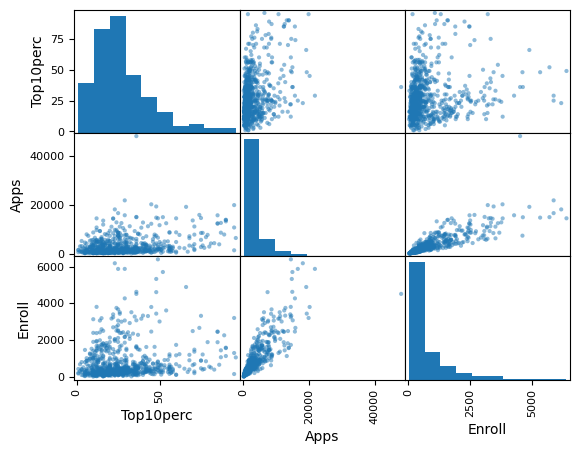

In [7]:
pd.plotting.scatter_matrix(df[['Top10perc', 'Apps', 'Enroll']])

<Axes: title={'center': 'Outstate'}, xlabel='Private', ylabel='Outstate'>

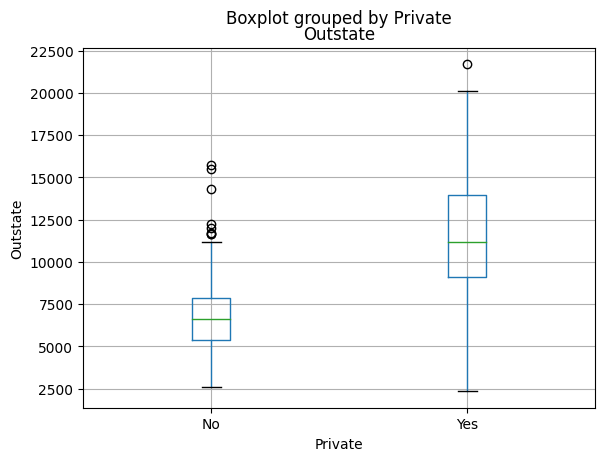

In [109]:
df.boxplot('Outstate', by='Private', ylabel='Outstate')

In [110]:
df['Elite'] = pd.cut(df['Top10perc'],
                     [0,50,100],
                     labels =['No', 'Yes'])
df['Elite'].value_counts()

Elite
No     699
Yes     78
Name: count, dtype: int64

<Axes: title={'center': 'Outstate'}, xlabel='Elite', ylabel='Outstate'>

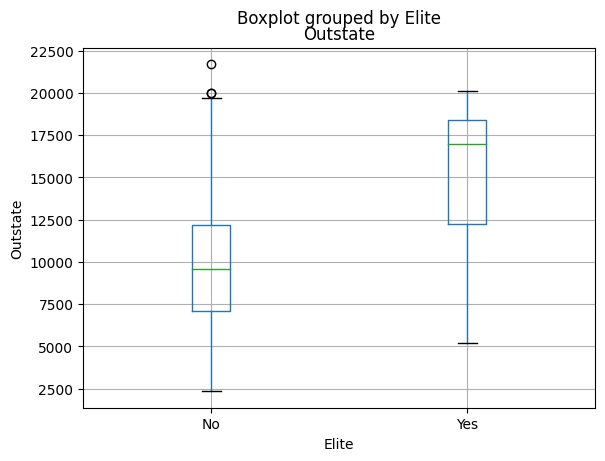

In [111]:
df.boxplot('Outstate', by='Elite', ylabel='Outstate')

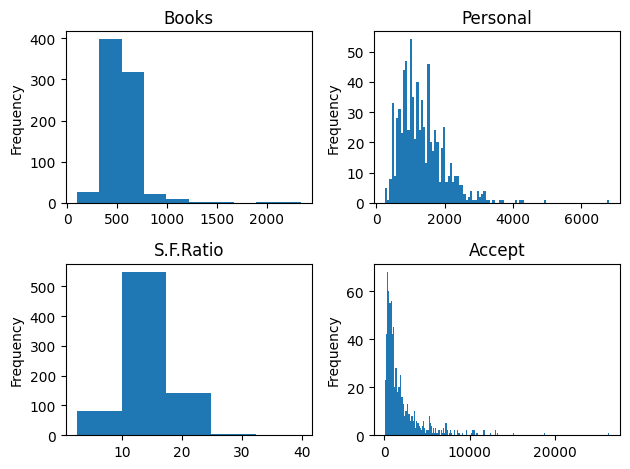

In [112]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax1 = df['Books'].plot.hist(bins=10, ax=ax1, title='Books')

ax2 = fig.add_subplot(2, 2, 2)
ax2 = df['Personal'].plot.hist(bins=100, ax=ax2, title='Personal')

ax3 = fig.add_subplot(2, 2, 3)
ax3 = df['S.F.Ratio'].plot.hist(bins=5, ax=ax3, title='S.F.Ratio')

ax4 = fig.add_subplot(2, 2, 4)
ax4 = df['Accept'].plot.hist(bins=200, ax=ax4, title='Accept')

plt.tight_layout()
plt.show()

# 9. This exercise involves the Auto data set studied in the lab.

In [3]:
file = '../datasets/Auto.csv'
df = pd.read_csv(file)

# Convert columns that contain numbers from "object" to "float"
conv_cols = df.apply(pd.to_numeric, errors='coerce')
conv_cols = conv_cols[df.columns[~conv_cols.isnull().all()]]
common_columns = conv_cols.columns
additional_columns = [col for col in df.columns if col not in common_columns]
df = conv_cols.merge(df[additional_columns], left_index=True, right_index=True)

In [4]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [114]:
quantitative = df.iloc[:, :7].columns
qualitative = df.iloc[:, 7:].columns

print('Quantitative:', quantitative)
print('Quantitative:', qualitative)

Quantitative: Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year'],
      dtype='object')
Qualitative: Index(['origin', 'name'], dtype='object')


In [130]:
for predictor in quantitative:
    print('Predictor:', predictor, 
          '| Range:', np.max(df[predictor]) - np.min(df[predictor]),
          '| Standard Deviation:', np.std(df[predictor]),
          '| Mean:', np.mean(df[predictor]))

df_subset = df[~df.index.isin(df.iloc[10:86].index)]
print('')
print('[10:85] index removed')
for predictor in quantitative:
    print('Predictor:', predictor, 
          '| Range:', np.max(df_subset[predictor]) - np.min(df[predictor]),
          '| Standard Deviation:', np.std(df_subset[predictor]),
          '| Mean:', np.mean(df_subset[predictor]))

Predictor: mpg | Range: 37.6 | Standard Deviation: 7.815941538224256 | Mean: 23.51586901763224
Predictor: cylinders | Range: 5 | Standard Deviation: 1.6994325855091355 | Mean: 5.458438287153652
Predictor: displacement | Range: 387.0 | Standard Deviation: 104.24803997948834 | Mean: 193.53274559193954
Predictor: horsepower | Range: 184.0 | Standard Deviation: 38.44203271442593 | Mean: 104.46938775510205
Predictor: weight | Range: 3527 | Standard Deviation: 846.8355568478047 | Mean: 2970.2619647355164
Predictor: acceleration | Range: 16.8 | Standard Deviation: 2.746529639056109 | Mean: 15.55566750629723
Predictor: year | Range: 12 | Standard Deviation: 3.6853546098832237 | Mean: 75.99496221662469

[10:85] index removed
Predictor: mpg | Range: 37.6 | Standard Deviation: 7.887612832492534 | Mean: 24.44485981308411
Predictor: cylinders | Range: 5 | Standard Deviation: 1.650908119022148 | Mean: 5.370716510903427
Predictor: displacement | Range: 387.0 | Standard Deviation: 99.70889452054736 | 

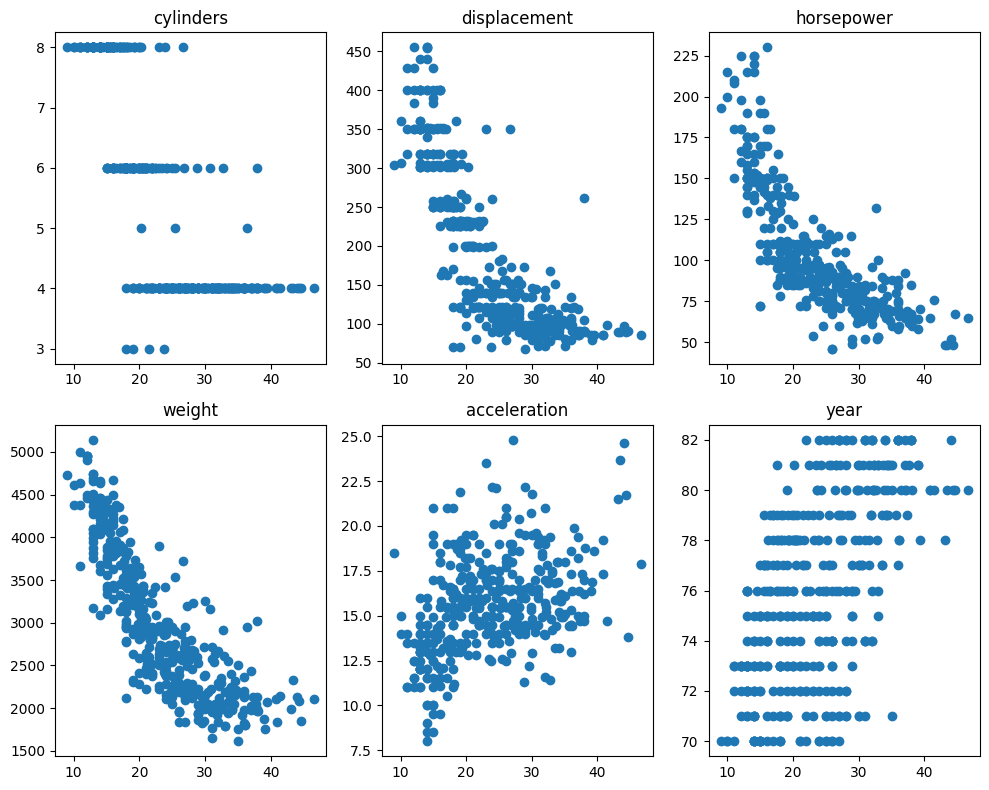

Displacement, horsepower and weight are good predictors for mpg


In [144]:
fig = plt.figure(figsize=(10,8))
for i, predictor in zip(range(1, 7), quantitative[1:]):
    ax = fig.add_subplot(2, 3, i)
    ax.scatter(x=df['mpg'], y=df[predictor])
    ax.set_title(predictor)
plt.tight_layout()
plt.show()

print('Displacement, horsepower and weight are good predictors for mpg.')

/tmp/ipykernel_99465/2050645155.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  ax = pd.plotting.scatter_matrix(df[quantitative], ax=ax)


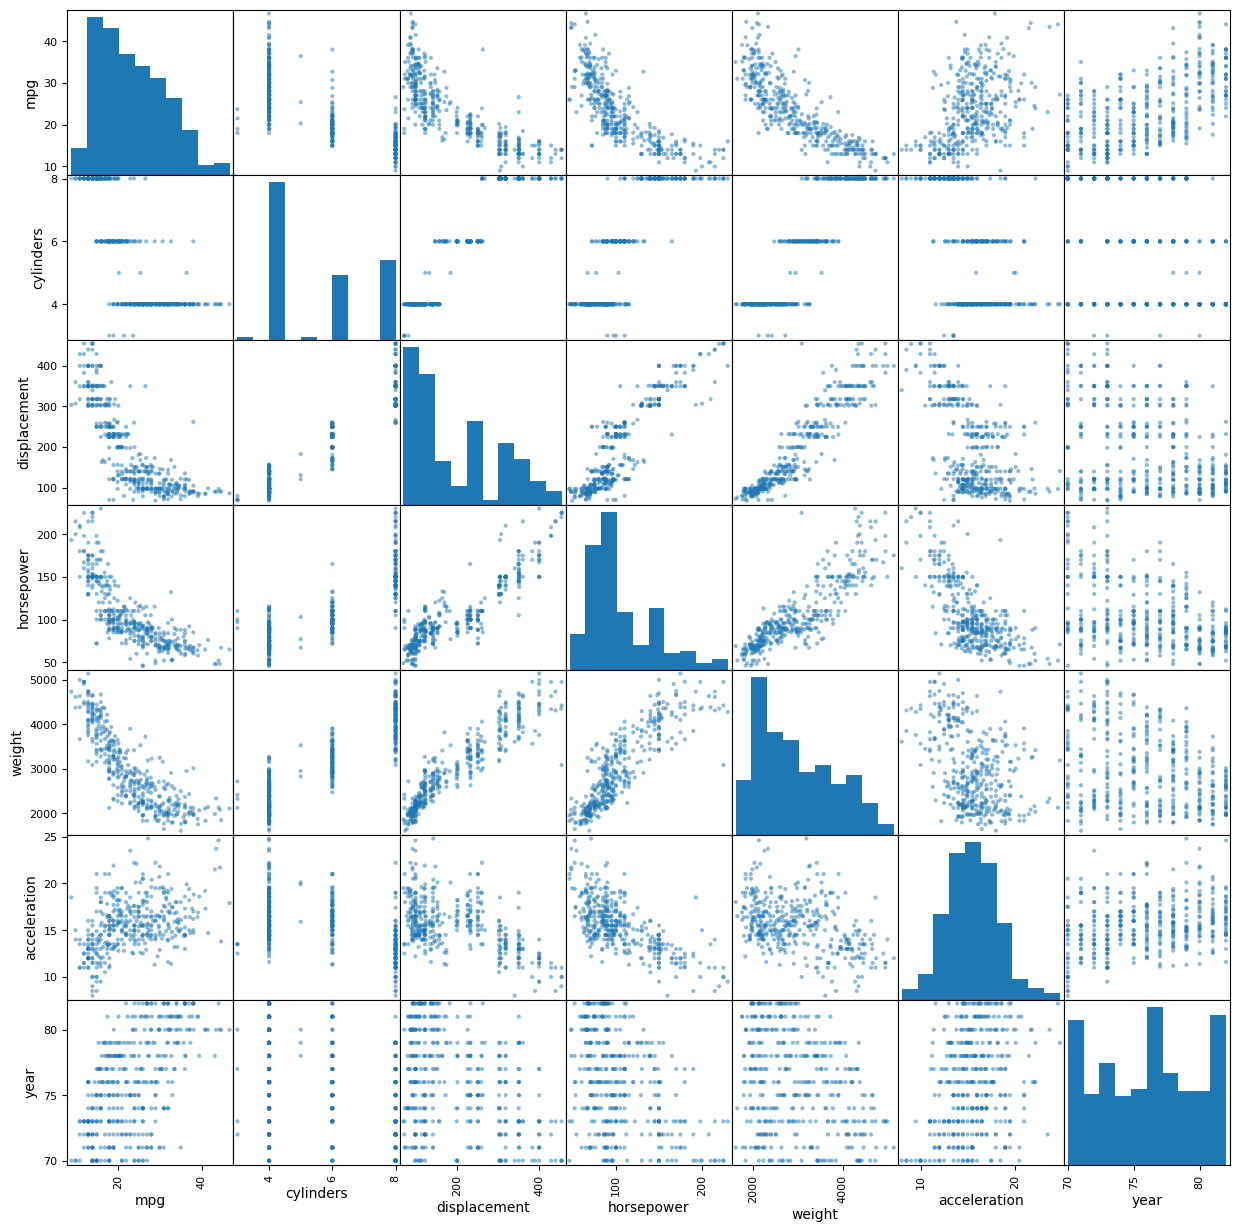

In [153]:
fig, ax = plt.subplots(figsize=(15,15))
ax = pd.plotting.scatter_matrix(df[quantitative], ax=ax)

# 10. This exercise involves the Boston housing data set.

In [156]:
file = '../datasets/Boston.csv'
df = pd.read_csv(file, index_col=0)

In [159]:
print('Rows:', df.shape[0])
print('Columns:', df.shape[1])

Rows: 506
Columns: 13


/tmp/ipykernel_99465/4086921863.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  ax = pd.plotting.scatter_matrix(df, ax=ax)


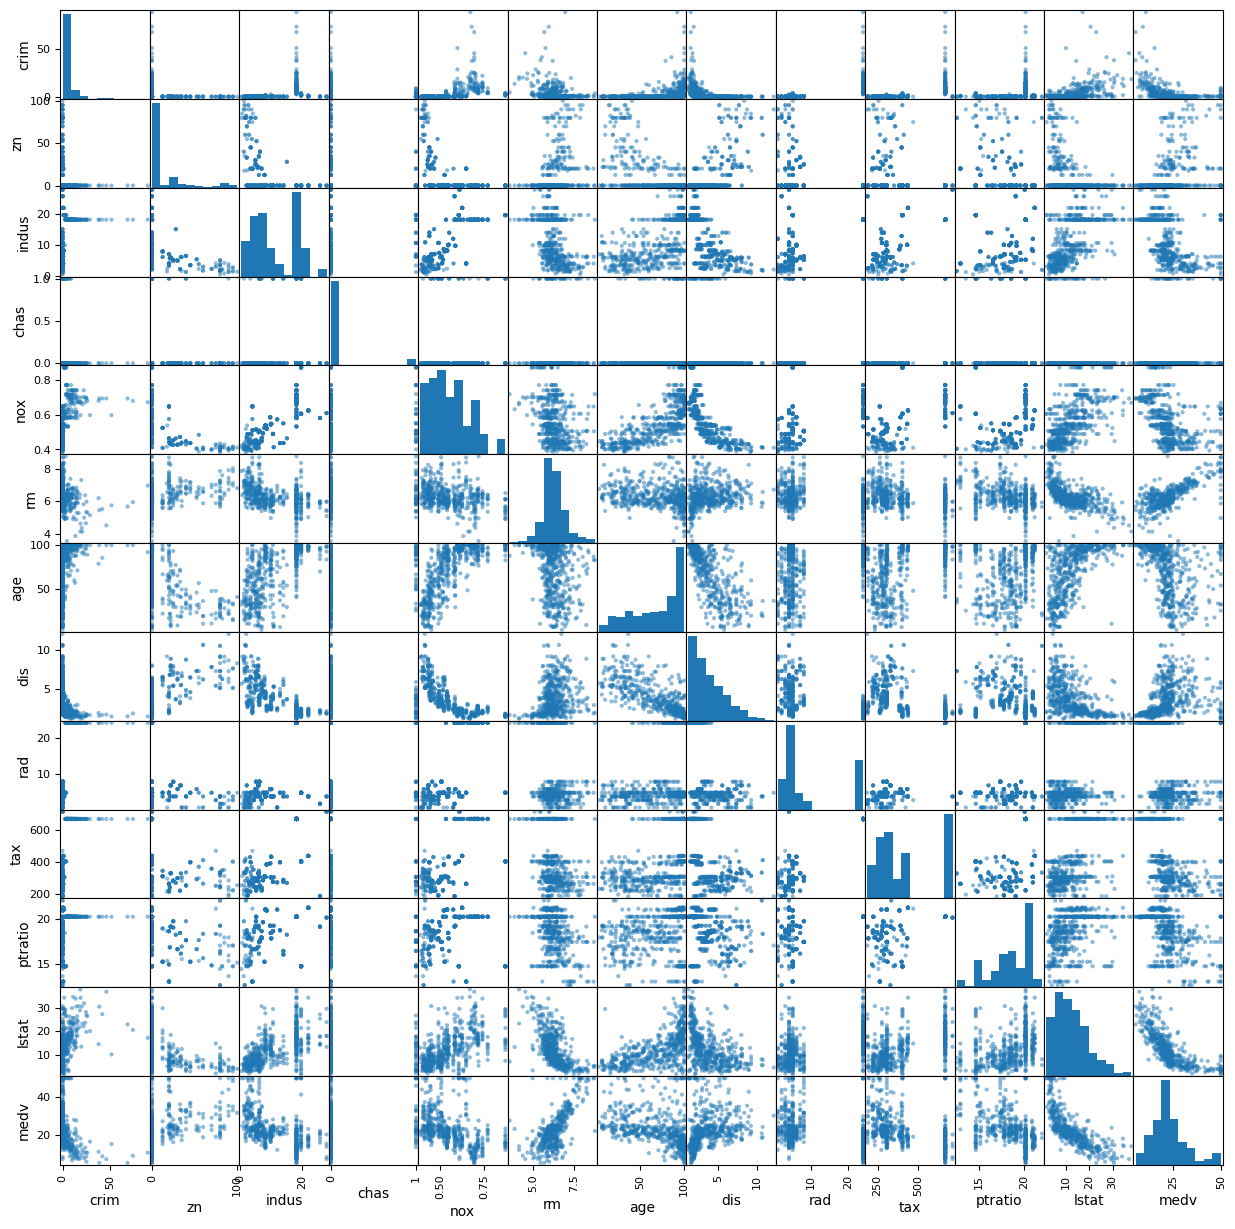

In [162]:
fig, ax = plt.subplots(figsize=(15,15))
ax = pd.plotting.scatter_matrix(df, ax=ax)

In [163]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
